# SVM <br/>
What we saw with Naive Bayes Classification was 'generative classification'. <br/>
SVM does 'discriminative classification'. <br/>
The idea here is to draw a 'margin' separating the different classes.

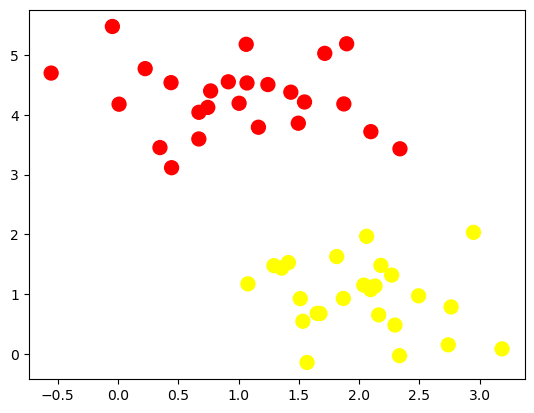

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np
X, y = make_blobs(n_samples=50,n_features=2, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plt.show()

In [14]:
X.shape

(50, 2)

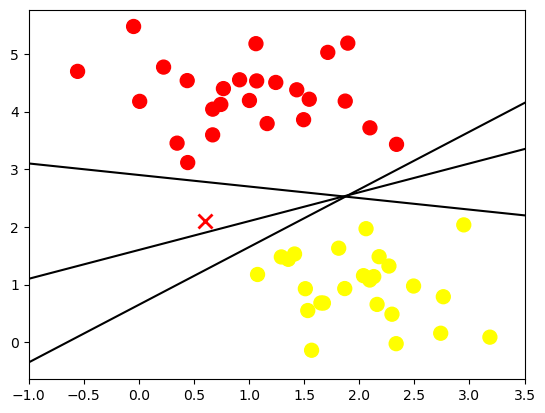

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

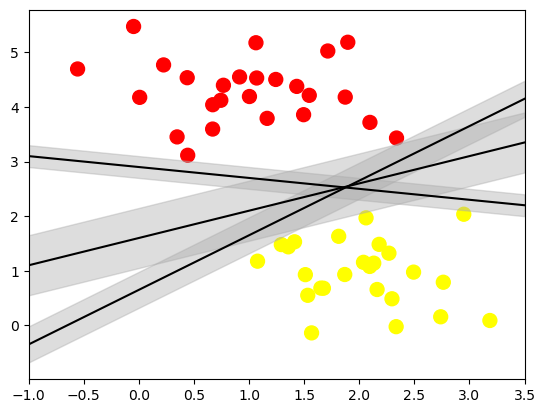

In [16]:
#Increase the Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',alpha=0.4)
plt.xlim(-1, 3.5);

In [17]:
#Fitting an SVM
from sklearn.svm import SVC

In [18]:
# Linear kernel means I want a line to split it.
model = SVC(kernel="linear",C=1E10)

In [19]:
model.fit(X,y) 

SVC(C=10000000000.0, kernel='linear')

In [20]:
def plot_svc_decision_function(model, ax=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    # Creates the grid
    Y, X = np.meshgrid(y, x)
    # Puts our X and Y values into a list of lists.
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

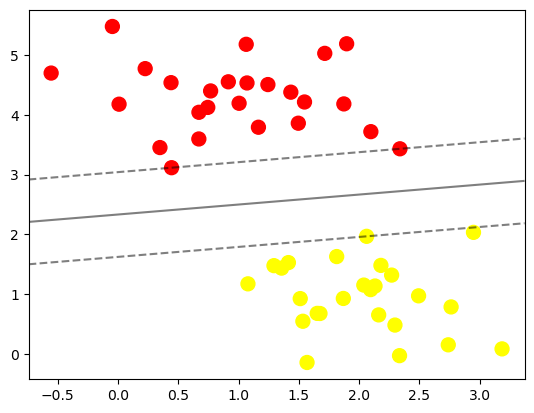

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plot_svc_decision_function(model)

# Support vectors
The points that lie on the margin.

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Other Kernels

What if a linear kernel doesn't work?

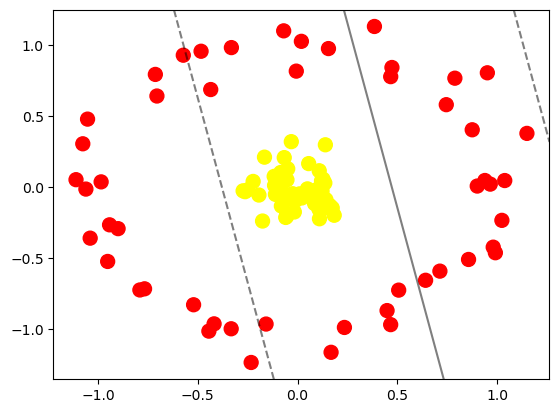

In [23]:
# Take the following example. Instead of using a linear kernel, a radial based kernel will work.
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plot_svc_decision_function(clf)

In [24]:
#Use a radial basis function kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

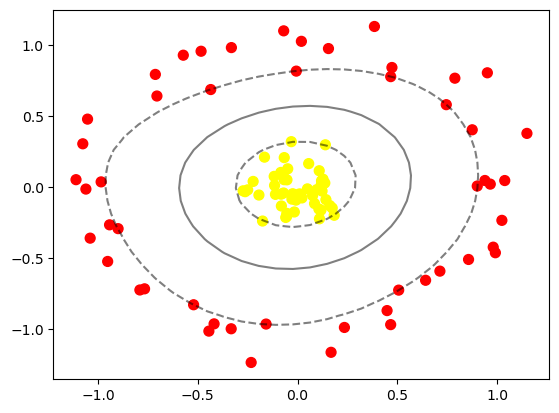

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

### What if you have inseparable classes?

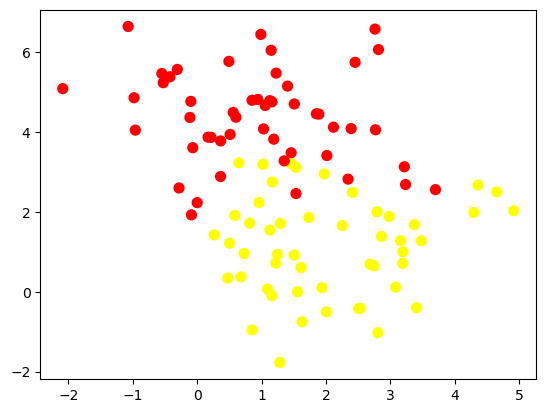

In [28]:
# Consider the following. It looks like these points are all in the same place.
X, y = make_blobs(n_samples=100, centers=2,
                              random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

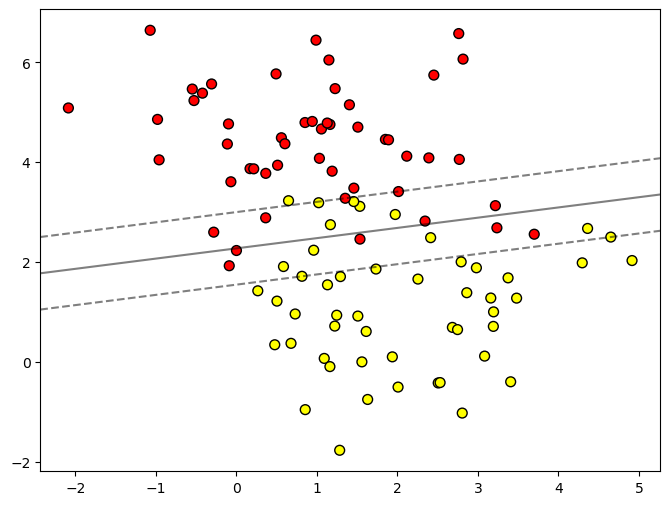

In [35]:
# We could expand into 3 dimensions and so on, but it could pose problems.
# Instead, we will keep the same dimensionality and adjust the span (the C value).
# Higher C values make the margin of error smaller.
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50, edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
plt.show()

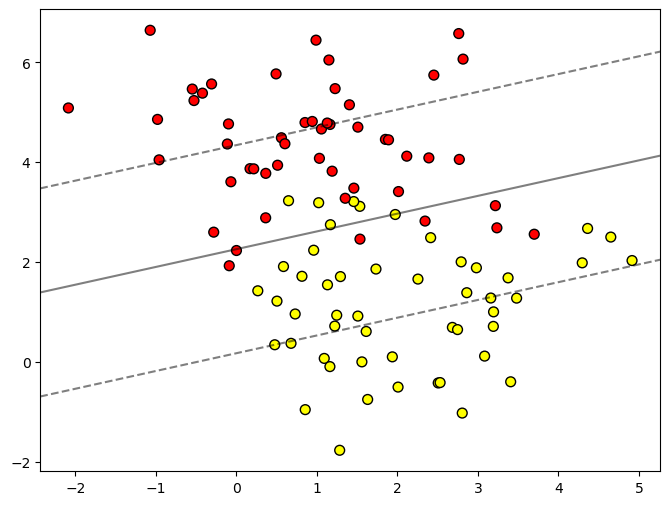

In [33]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
clf = SVC(kernel='linear', C=0.01)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50, edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
plt.show()

In [1]:
# Hyperparameters are the kernel and C value.